<a href="https://colab.research.google.com/github/leSIMPus/lab_3/blob/main/lab3-us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение
Базовая статистика для начинающих
* [Гистограмма](#1)
* [Выбросы](#2)
* [Ящик с усами](#3)
* [Сводная статистика](#4)
* [CDF](#5)
* [Размер эффекта](#6)
* [Взаимосвязь между переменными](#7)
* [Корреляция](#8)
* [Ковариация](#9)
* [Коэффициент корреляции Пирсона](#10)
* [Ранговая корреляция Спирмена](#11)
* [Среднее против медианы](#12)
* [Проверка гипотез](#13)
* [Нормальное (Гауссовское) распределение и z-оценка](#14)



### Датасет
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [6]:
# read data as pandas data frame
data = pd.read_csv("data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Задание 1 кратко методами pandas проаннализируйте датасет

In [16]:
## код здесь
print(f"Кол-во строк и столбцов: {data.shape}")
print(f"Типы данных в столбцах:\n {data.dtypes}")
print(f"Первые 5 строк:\n {data.head()}")
print(f"Общая инфа:\n {data.info()}")
print(f"Статистика численных столбцов:\n {data.describe()}")
print(f"Пропуски:\n {data.isnull().sum()}")

Кол-во строк и столбцов: (569, 31)
Типы данных в столбцах:
 diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          flo


## Гистограмма
* Сколько раз каждое значение появляется в наборе данных. Это описание называется распределением переменной.
* Наиболее распространенный способ представления распределения переменной - гистограмма, которая представляет собой график, показывающий частоту каждого значения.
* Частота = количество раз, которое каждое значение появляется
* Пример: [1,1,1,1,2,2,2]. Частота 1 равна четырем, а частота 2 равна трем.


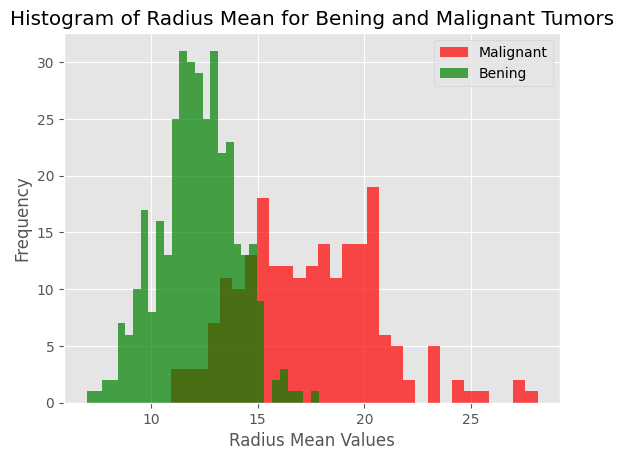

Most frequent malignant radius mean is:  20.101999999999997


In [17]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = 'red',alpha=0.7,color='red',label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = 'green',alpha=0.7,color='green',label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

* Давайте посмотрим на другие выводы
* Из этого графика видно, что средний радиус злокачественных опухолей в основном больше, чем средний радиус доброкачественных опухолей.
* Распределение доброкачественных опухолей (зеленый на графике) имеет приблизительно колоколообразную форму, что является формой нормального распределения (гауссовского распределения).
* Также вы можете найти такой результат, как наиболее частый средний радиус злокачественных опухолей.



## Выбросы
* При просмотре гистограммы видно, что в распределении доброкачественных опухолей (зеленый на графике) есть редкие значения.
* Эти значения могут быть ошибками или редкими событиями.
* Эти ошибки и редкие события можно назвать выбросами.
* Расчет выбросов:
  * сначала нужно рассчитать первый квартиль (Q1)(25%)
  * затем найти IQR (межквартильный размах) = Q3-Q1
  * наконец, вычислить Q1 - 1.5*IQR и Q3 + 1.5*IQR
  * Все, что находится за пределами этого диапазона, является выбросом.
  * давайте напишем код для распределения доброкачественной опухоли по признаку среднего радиуса


In [20]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
#YOUR code
Q1 = desc["25%"]
Q3 = desc["75%"]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]



## Ящик с усами
* Вы также можете увидеть выбросы на ящиковых диаграммах.
* Мы нашли 3 выброса в среднем радиусе доброкачественных опухолей, и на ящиковой диаграмме есть 3 выброса.


<function matplotlib.pyplot.show(close=None, block=None)>

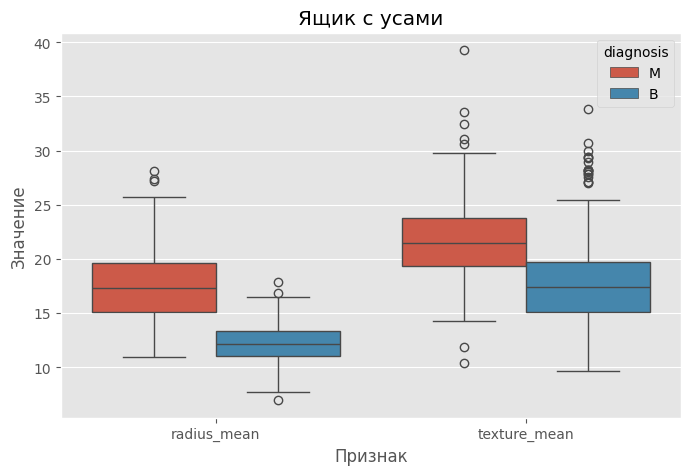

In [23]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
###Выведете Box Plot на основе melted data
plt.figure(figsize=(8,5))
sns.boxplot(data=melted_data, x='variable', y='value', hue='diagnosis')
plt.title("Ящик с усами")
plt.ylabel("Значение")
plt.xlabel("Признак")
plt.show


## Сводная статистика
* Среднее значение
* Дисперсия: разброс распределения
* Стандартное отклонение: квадратный корень из дисперсии
* Давайте посмотрим на сводную статистику среднего радиуса доброкачественных опухолей.


In [24]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


<a id="5"></a> <br>
## CDF
Интегральная функция распределения (Cumulative distribution function, CDF) — это вероятность того, что случайная переменная примет значение, меньшее или равное x. Формула: P(X <= x).
Давайте объясним это на примере графика CDF для среднего радиуса доброкачественных опухолей.
На графике мы можем задать вопрос: какова вероятность, что средний радиус будет меньше или равен 12? Ответ — 0.5. Это означает, что вероятность того, что переменная (средний радиус) примет значение 12 или меньше, составляет 0.5.
Построить график CDF можно двумя разными способами.

**Задание:** Постройте график интегральной функции распределения (CDF) для среднего радиуса доброкачественных опухолей.

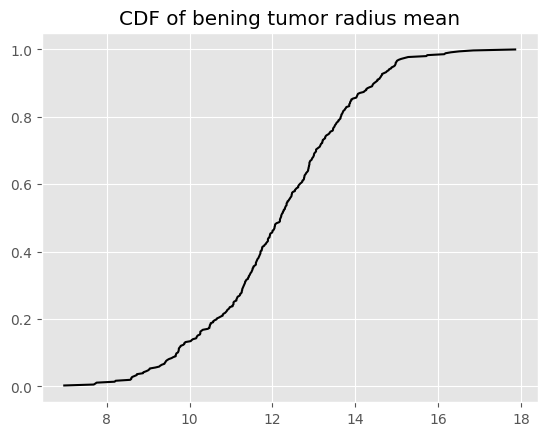

In [27]:
bening_radius = data_bening["radius_mean"]
sorted_data = np.sort(bening_radius)
y = np.arange(1,len(sorted_data)+1)/len(sorted_data)
plt.plot(sorted_data,y,color='black')
plt.title('CDF of bening tumor radius mean')
plt.show()


## Размер эффекта
* Одна из сводных статистик.
* Она описывает размер эффекта. Это простой способ количественной оценки различия между двумя группами.
* Другими словами, размер эффекта подчеркивает размер различия.
* Используйте размер эффекта Коэна.
* Коэн предполагает, что если d (размер эффекта) = 0.2, это маленький размер эффекта, d = 0.5 - средний размер эффекта, d = 0.8 - большой размер эффекта.
* Давайте сравним размер эффекта между средним радиусом доброкачественных опухолей и средним радиусом злокачественных опухолей.
* Размер эффекта равен 2.2, что слишком велико и говорит о том, что две группы отличаются друг от друга, как мы и ожидали. Потому что наши группы - это средний радиус доброкачественных опухолей и средний радиус злокачественных опухолей, которые отличаются друг от друга.


In [ ]:
d = (средний_радиус_злокачественных - средний_радиус_доброкачественных) / объединенное_стандартное_отклонение


## Взаимосвязь между переменными
* Мы можем сказать, что две переменные связаны друг с другом, если одна из них дает информацию о других.
* Например, цена и расстояние. Если вы едете на такси на большое расстояние, вы заплатите больше. Поэтому мы можем сказать, что цена и расстояние положительно связаны друг с другом.
* Диаграмма рассеяния
* Самый простой способ проверить взаимосвязь между двумя переменными.
* Давайте посмотрим на взаимосвязь между средним радиусом и средней площадью.
* На диаграмме рассеяния видно, что при увеличении среднего радиуса увеличивается и средняя площадь. Следовательно, они положительно коррелируют друг с другом.
* Нет корреляции между средней площадью и фрактальной размерностью se. Потому что при изменении средней площади фрактальная размерность se не зависит от изменения средней площади.


<Figure size 1500x1000 with 0 Axes>

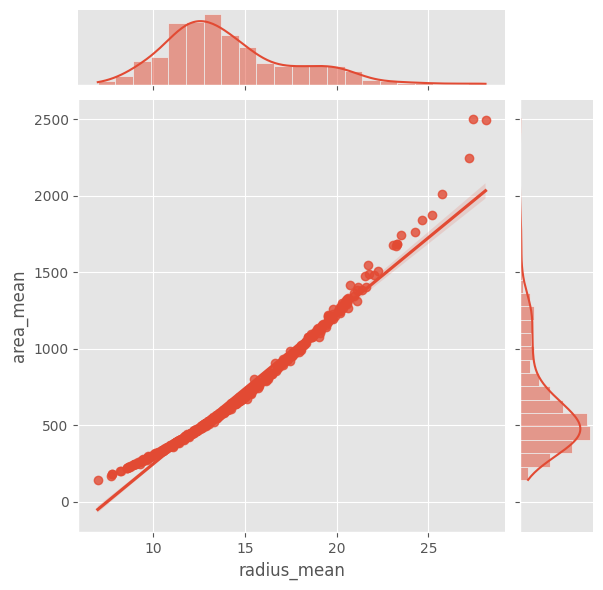

In [28]:
plt.figure(figsize = (15,10))
sns.jointplot(x="radius_mean", y="area_mean", data=data, kind="reg")
plt.show()

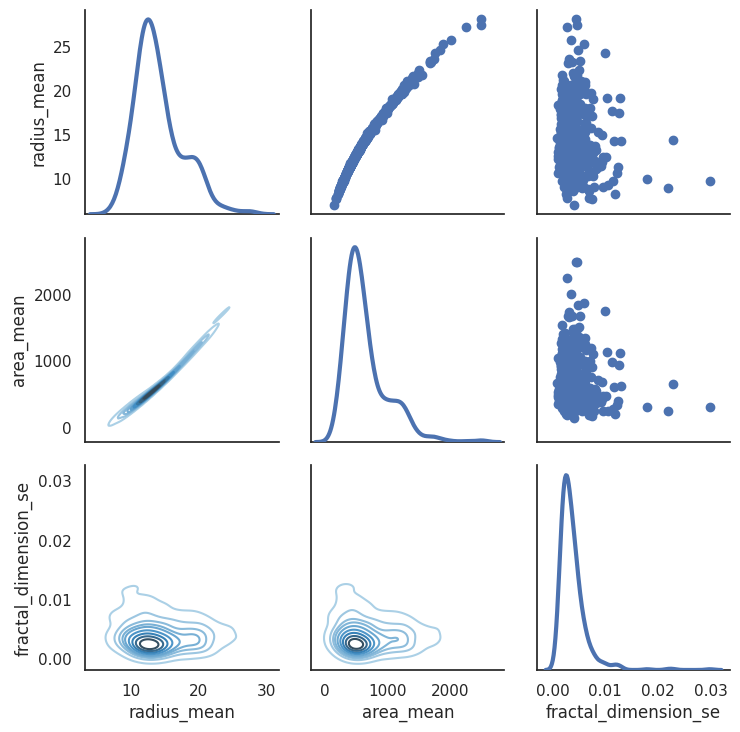

In [29]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()


## Корреляция
* Сила взаимосвязи между двумя переменными.
* Давайте посмотрим на корреляцию между всеми признаками.


                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

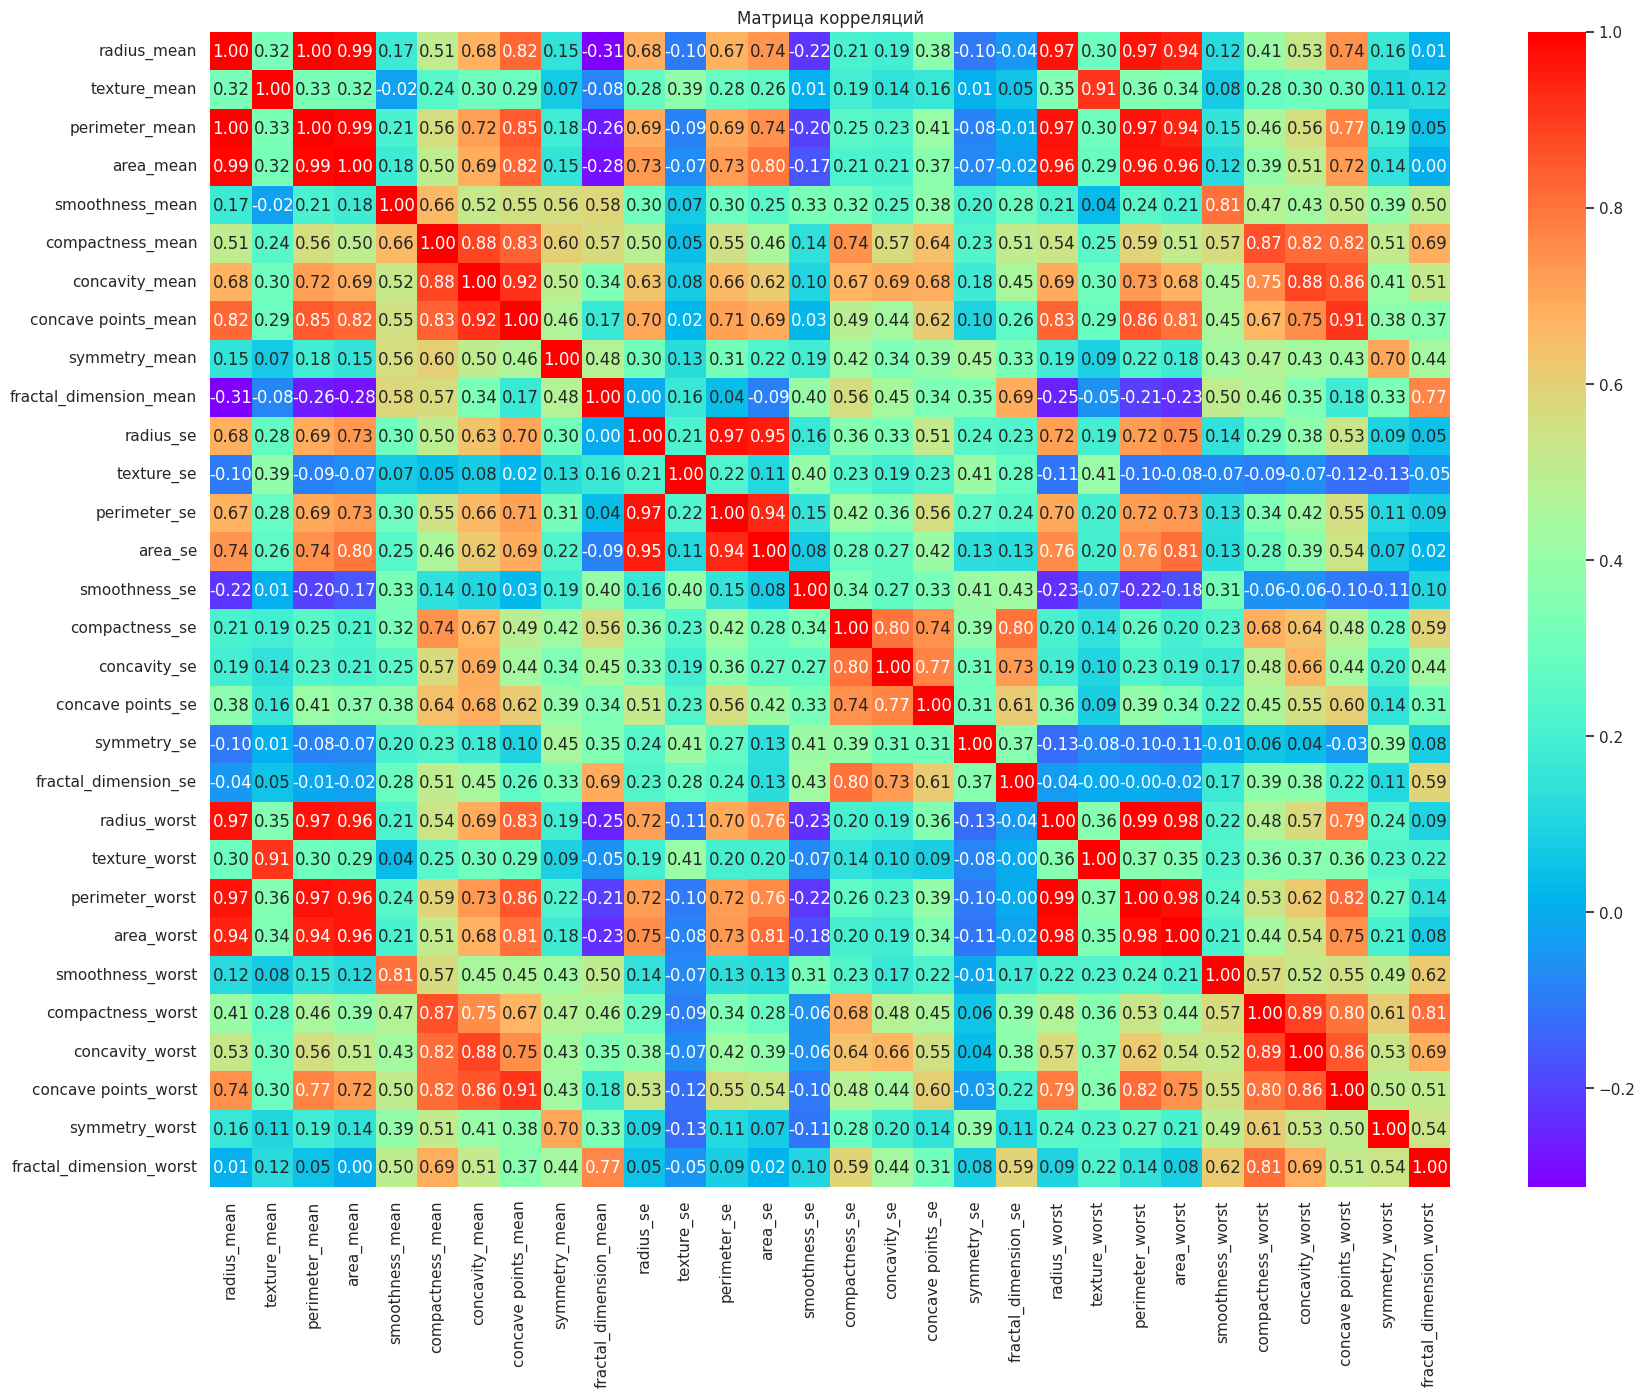

In [35]:
##Ваш код
num = data.select_dtypes(include=[np.number])
corr = num.corr()
print(corr)

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rainbow", cbar=True)
plt.title("Матрица корреляций")
plt.show()


## Ковариация
* Ковариация - это мера тенденции двух переменных изменяться вместе.
* Таким образом, ковариация максимальна, если два вектора идентичны.
* Ковариация равна нулю, если они ортогональны.
* Ковариация отрицательна, если они направлены в противоположные стороны.
* Давайте посмотрим на ковариацию между средним радиусом и средней площадью. Затем посмотрим на средний радиус и фрактальную размерность se.


In [42]:
#np.cov()
cov1 = data['radius_mean'].cov(data["area_mean"])
print(f"Ковариация между средним радиусом и средней площадью: {cov1}")
cov2 = data['radius_mean'].cov(data["fractal_dimension_se"])
print(f"Ковариация между средним радиусом и фрактальной размерностью: {cov2}")

Ковариация между средним радиусом и средней площадью: 1224.483409346457
Ковариация между средним радиусом и фрактальной размерностью: -0.0003976248576440629



## Коэффициент корреляции Пирсона
* Частное от деления ковариации на стандартное отклонение переменных.
* Давайте посмотрим на коэффициент корреляции Пирсона между средним радиусом и средней площадью.
* Сначала давайте используем метод .corr(), который мы фактически использовали в части корреляции. В части корреляции мы фактически использовали коэффициент корреляции Пирсона :)
* p1 и p2 одинаковы. В p1 мы используем метод corr(), в p2 мы применяем определение коэффициента корреляции Пирсона (cov(A,B)/(std(A)*std(B)))
* Как мы и ожидали, коэффициент корреляции Пирсона между средней площадью и средней площадью равен 1, что означает, что они имеют одинаковое распределение.
* Также коэффициент корреляции Пирсона между средней площадью и средним радиусом равен 0.98, что означает, что они положительно коррелируют друг с другом, и взаимосвязь между ними очень высока.
* Чтобы было понятнее, то, что мы делали в части корреляции и в части коэффициента корреляции Пирсона, одно и то же.


In [47]:
#ваш код здесь
x = data["radius_mean"]
y = data["area_mean"]
#p1
print(f"Корреляция c помощью метода: {x.corr(y)}")
#p2
print(f"Ручная корреляция: {x.cov(y)/(x.std()*y.std())}")

Корреляция c помощью метода: 0.9873571700566127
Ручная корреляция: 0.9873571700566132



## Ранговая корреляция Спирмена
* Коэффициент корреляции Пирсона хорошо работает, если взаимосвязь между переменными линейна и переменные примерно нормальны. Но он не устойчив, если есть выбросы.
* Для вычисления корреляции Спирмена нам нужно вычислить ранг каждого значения.


In [49]:
ranked_data = data.rank()
spearman_corr = ranked_data['radius_mean'].corr(ranked_data["area_mean"], method='spearman')
print(f"Корреляция Спирмена: {spearman_corr}")

Корреляция Спирмена: 0.9996020278067481


* Корреляция Спирмена немного выше, чем корреляция Пирсона.
  * Если взаимосвязь между распределениями нелинейна, корреляция Спирмена, как правило, лучше оценивает силу взаимосвязи.
  * Коэффициент корреляции Пирсона может быть подвержен влиянию выбросов. Корреляция Спирмена более устойчива.



## Среднее против медианы
* Иногда вместо среднего значения нам нужно использовать медиану. Я объясню, почему нам нужно использовать медиану, на примере.
* Давайте представим, что в компании работают 10 человек. Начальник компании повысит им зарплату, если среднее значение их зарплаты меньше 5.


In [50]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Среднее значение зарплаты составляет 52.5, поэтому начальник думает, что он слишком много платит своим сотрудникам. И не повышает им зарплату. Однако, как вы знаете, это несправедливо, и 500 (зарплата) является выбросом для этого списка зарплат.
* Медиана избегает выбросов.


In [51]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


* Теперь медиана зарплаты равна 3, что меньше 5, и сотрудники получат повышение зарплаты, они счастливы, и эта ситуация справедлива :)



## Проверка гипотез
* Классическая проверка гипотез
* Мы хотим ответить на этот вопрос: "учитывая выборку и видимый эффект, какова вероятность увидеть такой эффект случайно?"
* Первый шаг - количественно оценить размер видимого эффекта, выбрав тестовую статистику. Естественный выбор для тестовой статистики - разница в средних значениях между двумя группами.
* Второй шаг - определить нулевую гипотезу, которая является моделью системы, основанной на предположении, что видимый эффект не реален. Нулевая гипотеза - это тип гипотезы, используемый в статистике, который предполагает отсутствие статистической значимости в наборе заданных наблюдений. Нулевая гипотеза - это гипотеза, которую люди пытаются опровергнуть. Альтернативная гипотеза - это гипотеза, которую люди хотят попытаться доказать.
* Третий шаг - вычислить p-значение, которое является вероятностью увидеть видимый эффект, если нулевая гипотеза верна. Предположим, у нас есть тест нулевой гипотезы. Затем мы вычисляем p-значение. Если p-значение меньше или равно порогу, мы отвергаем нулевую гипотезу.
* Если p-значение низкое, эффект считается статистически значимым, что означает, что он вряд ли произошел случайно. Поэтому мы можем сказать, что эффект с большей вероятностью появится в более крупной популяции.
* Давайте приведем пример. Нулевая гипотеза: мир плоский. Альтернативная гипотеза: мир круглый. Несколько ученых решили опровергнуть нулевую гипотезу. Это в конечном итоге привело к отвержению нулевой гипотезы и принятию альтернативной гипотезы.
* Другой пример. "Этот эффект реален" - это нулевая гипотеза. Основываясь на этом предположении, мы вычисляем вероятность видимого эффекта. Это p-значение. Если p-значение низкое, мы делаем вывод, что нулевая гипотеза вряд ли верна.
* Теперь давайте приведем наш пример:
  * Я хочу узнать, связаны ли средний радиус и средняя площадь друг с другом? Моя нулевая гипотеза заключается в том, что "взаимосвязь между средним радиусом и средней площадью равна нулю в популяции опухолей".
  * Теперь нам нужно опровергнуть эту нулевую гипотезу, чтобы продемонстрировать, что средний радиус и средняя площадь связаны. (на самом деле мы знаем это из нашего предыдущего опыта)
  * давайте найдем p-значение (значение вероятности)


In [62]:
# ваш код
x = data["radius_mean"]
y = data["area_mean"]
corr_coef, p_value = pearsonr(x,y)
alpha = 0.05
print(f"P-значение равно: {p_value}")
if p_value < alpha:
  print("Отвергаем гипотезу")
else:
  print("Принимаем гипотезу")

P-значение равно: 0.0
Отвергаем гипотезу


* P-значение почти равно нулю, поэтому мы можем отвергнуть нулевую гипотезу.


* P values is almost zero so we can reject null hypothesis.


## Нормальное (Гауссовское) распределение и z-оценка
* Также называется колоколообразным распределением.
* Вместо формального определения гауссовского распределения я хочу объяснить его на примере.
* Классический пример гауссовского распределения - это IQ.
  * В мире, допустим, средний IQ составляет 110.
  * Есть несколько человек, которые очень умны, и их IQ выше 110. Он может быть 140 или 150, но это редкость.
  * Также есть несколько человек с низким интеллектом, и их IQ ниже 110. Он может быть 40 или 50, но это редкость.
  * Из этой информации мы можем сказать, что средний IQ составляет 110. И допустим, стандартное отклонение равно 20.
  * Среднее и стандартное отклонение - это параметры нормального распределения.
  * Давайте создадим 100000 выборок и визуализируем их с помощью гистограммы.


mean:  110.02801822648493
standart deviation:  19.968843568166374


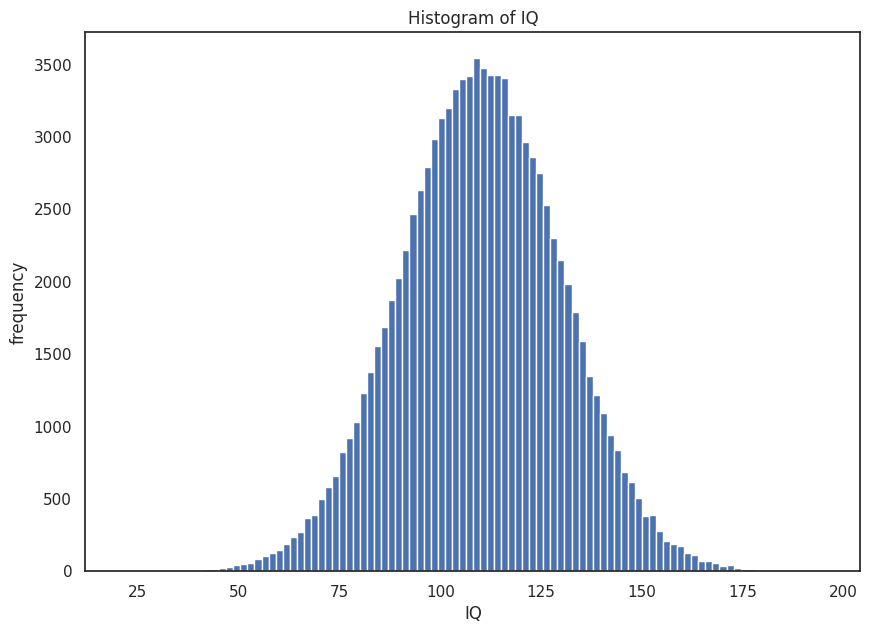

In [60]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, density=False) # Changed normed to density
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

* Как видно из гистограммы, большинство людей сосредоточено около 110, что является средним значением нашего нормального распределения.
* Однако что такое "большинство", о котором я упомянул в предыдущем предложении? Что, если я хочу узнать, какой процент людей должен иметь IQ от 80 до 140?
* Мы будем использовать z-оценку, чтобы ответить на этот вопрос.
    * z = (x - среднее) / стандартное отклонение
    * z1 = (80-110)/20 = -1.5
    * z2 = (140-110)/20 = 1.5
    * Расстояние между средним значением и 80 составляет 1.5 стандартного отклонения, а расстояние между средним значением и 140 составляет 1.5 стандартного отклонения.
    * Если вы посмотрите на таблицу z-оценок, вы увидите, что 1.5 стандартного отклонения соответствует 0.4332.
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>

      * Давайте рассчитаем это с 2, потому что 1 от 80 до среднего значения, а другое от среднего значения до 140.
      * 0.4332 * 2 = 0.8664
      * 86.64% людей имеют IQ от 80 до 140.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

* Какой процент людей должен иметь IQ меньше 80?
* z = (110-80)/20 = 1.5
* Давайте посмотрим на таблицу z-оценок 0.4332. 43.32% людей имеют IQ от 80 до среднего значения (110).
* Если мы вычтем из 50% 43.32%, мы сможем найти процент людей с IQ меньше 80.
* 50-43.32 = 6.68. В результате 6.68% людей имеют IQ меньше 80.


## последнее задание

Сделать Z оценку для данного датасета

1. сформулировать гипотезы
2. посчитать z-оценку
3. посчитать p-value
4. на основе уровня значимости $\alpha$ подтвердить/опровергнуть гипотезы

In [76]:
# ваш код здесь
# Нулевая гипотеза: средний радиус доброкачественных опухолей равен 14
# Альтернативная: ср. рад. не равен 14
s = data_bening["radius_mean"]
alpha = 0.05
b = 14
x = s.mean()
sigma = s.std()
n = len(s)
z_score = (x-b)/(sigma/np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print("Z-оценка:", z_score)
print("P-значение:", p_value)
if p_value < alpha:
  print("Отвергаем нулевую гипотезу")
else:
  print("Принимаем нулевую гипотезу")

Z-оценка: -19.66872919484749
P-значение: 0.0
Отвергаем нулевую гипотезу
